In [37]:
!pip install yt-dlp jupyter_ui_poll

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [38]:
import yt_dlp
from yt_dlp.utils import download_range_func

start_time = 2  # accepts decimal value like 2.3
end_time = 7

yt_opts = {
    'verbose': True,
    # 'download_ranges': download_range_func(None, [(start_time, end_time)]),
    # 'force_keyframes_at_cuts': True,
}

# with yt_dlp.YoutubeDL(yt_opts) as ydl:
#     ydl.download("https://www.youtube.com/watch?v=BxUS1K7xu30")
# Don't forget force_keyframes_at_cuts if you want a precise cut.

In [39]:
with yt_dlp.YoutubeDL() as ydl:
    ydl.download("https://m.youtube.com/watch?v=cQdAZ94OkNA")

[youtube] Extracting URL: https://m.youtube.com/watch?v=cQdAZ94OkNA
[youtube] cQdAZ94OkNA: Downloading webpage
[youtube] cQdAZ94OkNA: Downloading ios player API JSON
[youtube] cQdAZ94OkNA: Downloading mweb player API JSON
[youtube] cQdAZ94OkNA: Downloading m3u8 information
[info] cQdAZ94OkNA: Downloading 1 format(s): 18
[download] Jion - Shotokan (SKIF) - Hirokazu Kanazawa [cQdAZ94OkNA].mp4 has already been downloaded
[download] 100% of    4.46MiB


In [40]:
# Importing all necessary libraries
import cv2
import os
import time
from IPython.display import display, clear_output
import ipywidgets as widgets
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from jupyter_ui_poll import ui_events
import time

In [41]:
#button = widgets.Button(description="Click Me!")
#output = widgets.Output()

# display(button, output)

#button.on_click(on_button_clicked)

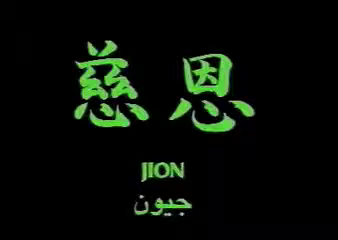

In [ ]:
# Read the video from specified path
cam = cv2.VideoCapture("/content/Jion - Shotokan (SKIF) - Hirokazu Kanazawa [cQdAZ94OkNA].mp4")

try:

    # creating a folder named data
    if not os.path.exists('data'):
        os.makedirs('data')

    # if not created then raise error
except OSError:
    print('Error: Creating directory of data')

# frame
currentframe = 0

clicked = False

def on_button0_clicked(b):
    global clicked
    clicked = True
    with output:
        print("No Oi-Tzuki")

def on_button1_clicked(b):
    global clicked
    clicked = True
    with output:
        print("Oi-Tzuki")

output = widgets.Output()
button0 = widgets.Button(description="No Oi-Tzuki")
button1 = widgets.Button(description="Oi-Tzuki")
button0.on_click(on_button0_clicked)
button1.on_click(on_button1_clicked)
display(output, button0, button1)

with ui_events() as poll:
    while (True):
        # time.sleep(60) # take schreenshot every 5 seconds
        # reading from frame
        ret, frame = cam.read()

        if ret:
            if currentframe%100==0:
                # if video is still left continue creating images
                name = './data/frame' + str(currentframe//100).zfill(4) + '.jpg'
                # print('Creating...' + name)
                with output:
                    clear_output(wait=True)
                    cv2_imshow(frame)
                clicked = False
                while not clicked:
                    poll(10) # poll queued UI events including button
                    time.sleep(1) # wait for 1 second before checking again
                # writing the extracted images
                cv2.imwrite(name, frame)

            # increasing counter so that it will
            # show how many frames are created
            currentframe += 1
        else:
            break

# Release all space and windows once done
cam.release()
cv2.destroyAllWindows()